In [1]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
from keras import layers
#from keras.layers import BatchNormalization
from keras.models import Model
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA
from mpl_toolkits.mplot3d import Axes3D
import IPython
import librosa.display

In [2]:
optimizer = tf.keras.optimizers.Adam(0.0001)
latent_dim = 128
sr = 48000
sr16k = 16000
fx = ["BluesDriver", "Chorus", "Clean", "Digital Delay", "Flanger", "Phaser", "Rat", "Sweep Echo", "Tape Echo","Tube Screamer"]

In [3]:
# mount your Google drive so that you only have to download the data only once
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
######load your data#######
import os
from os import walk
import numpy as np
# load your data
paths = ["/content/drive/MyDrive/SampledGuitar/Stratocaster/BluesDriver",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Chorus",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Clean",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Digital Delay",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Flanger",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Phaser",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/RAT",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/Sweep Echo",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/TapeEcho",
         "/content/drive/MyDrive/SampledGuitar/Stratocaster/TubeScreamer"
         ]
#print(paths)
audios = []
labels = []
labelsname = []
for i in paths:
    for (dirpath, dirnames, filenames) in walk(i):
      for directory in dirpath:
        for filename in filenames:
            audios.append(os.path.join(dirpath, filename))
        #print(filenames)
        #audios.append(filenames)
        break
print(len(audios))

6901


In [ ]:
audios = [audios[i] for i in range(0,len(audios),10)]
print(len(audios))

691


In [5]:
###rawwaveform
import librosa
import numpy as np

waveforms = []

for track in audios:
  if track.endswith("wav"):
    y,fs = librosa.load(track)
    waveforms.append(librosa.resample(y[:sr], sr, sr16k))
waveforms = np.array(waveforms)
print(waveforms.shape)

(6900, 16000)


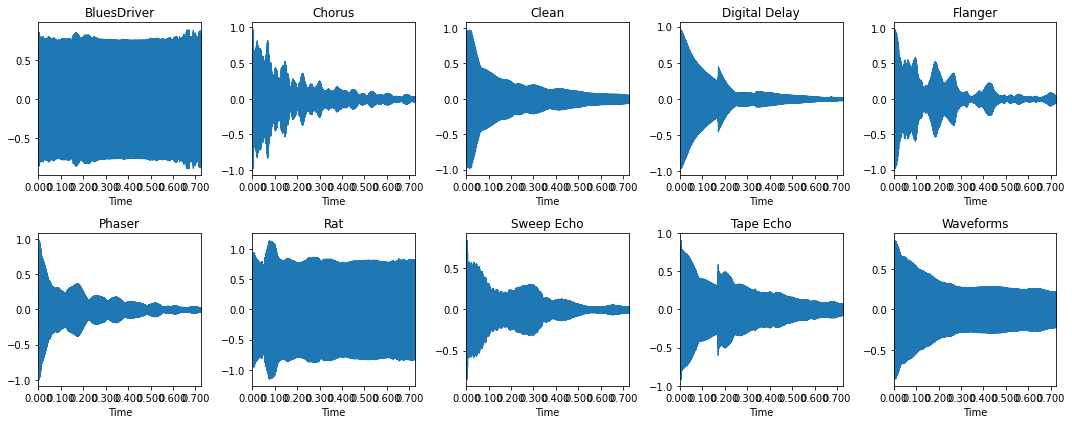

In [6]:
####visualización de los audios antes de normalizar
plt.figure(figsize=(15, 6))
sonidos = [i * 690 for i in range(10)]
for i, x in enumerate(sonidos):
    plt.subplot(2, 5, i+ 1).set_title(fx[i])
    librosa.display.waveplot(waveforms[x])
plt.tight_layout()
plt.title("Waveforms")
plt.show()

In [10]:
IPython.display.Audio(waveforms[sonidos[1]], rate= sr16k)

In [11]:
###normalizar y cambio de dimensionalidad
mu_wave = np.mean(waveforms, axis= 1)[...,np.newaxis]
max_wave = np.max(waveforms, axis=1)[...,np.newaxis]

Xw = (waveforms-mu_wave)/max_wave
print(Xw.shape)

(6900, 16000)


In [ ]:
print(sonidos)

[0, 69, 138, 207, 276, 345, 414, 483, 552, 621]


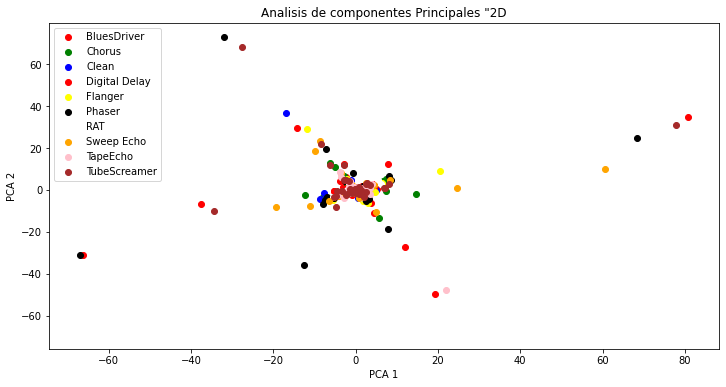

In [12]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xw)

plt.scatter(X_PCA[:68, 0], X_PCA[:68, 1], c='red', label='BluesDriver')
plt.scatter(X_PCA[69:137, 0], X_PCA[69:137, 1], c='green', label='Chorus')
plt.scatter(X_PCA[138:206, 0], X_PCA[138:206, 1], c='blue', label='Clean')
plt.scatter(X_PCA[207:275, 0], X_PCA[207:275, 1], c='red', label= 'Digital Delay')
plt.scatter(X_PCA[276:344, 0], X_PCA[276:344, 1], c='yellow', label= 'Flanger')
plt.scatter(X_PCA[345:413, 0], X_PCA[345:413, 1], c='black', label= 'Phaser')
plt.scatter(X_PCA[414:482, 0], X_PCA[414:482, 1], c='white', label= 'RAT')
plt.scatter(X_PCA[483:551, 0], X_PCA[483:551, 1], c='orange', label= 'Sweep Echo')
plt.scatter(X_PCA[552:620, 0], X_PCA[552:620, 1], c='pink', label= 'TapeEcho')
plt.scatter(X_PCA[621:689, 0], X_PCA[621:689, 1], c='brown', label= 'TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

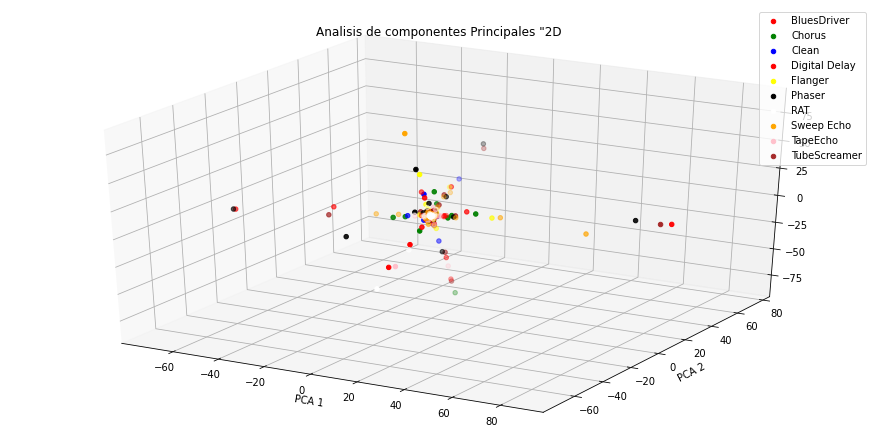

In [13]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xw)

ax.scatter3D(X_PCA[:68, 0], X_PCA[:68, 1],X_PCA[:68, 2], c='red', label='BluesDriver')
ax.scatter3D(X_PCA[69:137, 0], X_PCA[69:137, 1],X_PCA[69:137, 2], c='green', label='Chorus')
ax.scatter3D(X_PCA[138:206, 0], X_PCA[138:206, 1],X_PCA[138:206, 2], c='blue', label='Clean')
ax.scatter3D(X_PCA[207:275, 0], X_PCA[207:275, 1],X_PCA[207:275, 2], c='red', label='Digital Delay')
ax.scatter3D(X_PCA[276:344, 0], X_PCA[276:344, 1],X_PCA[276:344, 2], c='yellow', label= 'Flanger')
ax.scatter3D(X_PCA[345:413, 0], X_PCA[345:413, 1],X_PCA[345:413, 2], c='black', label='Phaser')
ax.scatter3D(X_PCA[414:482, 0], X_PCA[414:482, 1],X_PCA[414:482, 2], c='white', label='RAT')
ax.scatter3D(X_PCA[483:551, 0], X_PCA[483:551, 1],X_PCA[483:551, 2], c='orange', label='Sweep Echo')
ax.scatter3D(X_PCA[552:620, 0], X_PCA[552:620, 1],X_PCA[552:620, 2], c='pink', label='TapeEcho')
ax.scatter3D(X_PCA[621:689, 0], X_PCA[621:689, 1],X_PCA[621:689, 2], c='brown', label='TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

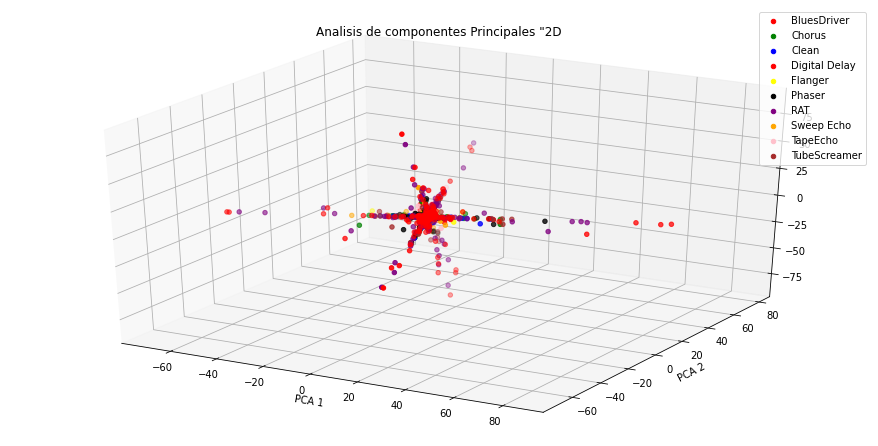

In [15]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xw)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label='BluesDriver')
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label='Chorus')
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label='Clean')
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label='Digital Delay')
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= 'Flanger')
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label='Phaser')
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='purple', label='RAT')
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label='Sweep Echo')
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label='TapeEcho')
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label='TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

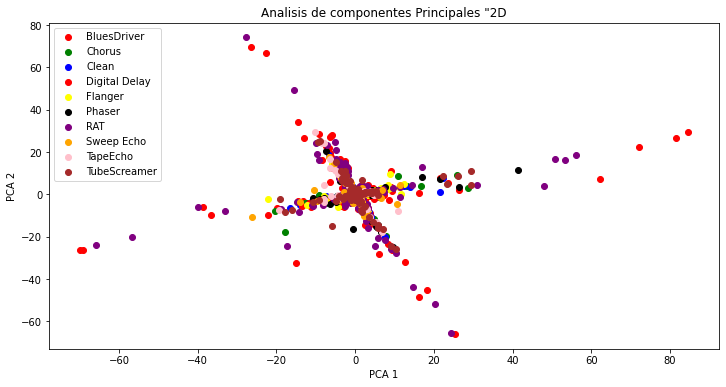

In [17]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xw)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='red', label='BluesDriver')
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='green', label='Chorus')
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='blue', label='Clean')
plt.scatter(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1], c='red', label= 'Digital Delay')
plt.scatter(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1], c='yellow', label= 'Flanger')
plt.scatter(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1], c='black', label= 'Phaser')
plt.scatter(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1], c='purple', label= 'RAT')
plt.scatter(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1], c='orange', label= 'Sweep Echo')
plt.scatter(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1], c='pink', label= 'TapeEcho')
plt.scatter(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1], c='brown', label= 'TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [18]:
#####reshape de los datos
Xw = Xw[...,np.newaxis][...,np.newaxis]
print(Xw.shape)

(6900, 16000, 1, 1)


In [63]:
####AUTOENCODER
optimizer = tf.keras.optimizers.Adam(0.0001)
latent_dim = 128
original_dim = (sr16k, 1, 1)
encoder_inputs = keras.Input(original_dim)                                                   # bat, samps, ?, ch
x = layers.Conv2D(64, (33,1), activation="relu", padding="same",strides=(4,1))(encoder_inputs) # [69, 48000, 1, 1] -> [69, 12000, 1, 64]
x = layers.Conv2D(128,(33,1), activation="relu", padding="same",strides=(4,1))(x)
x = layers.Conv2D(256,(33,1), activation="relu", padding="same",strides=(4,1))(x)
x = layers.Conv2D(512,(33,1), activation="relu", padding="same",strides=(3,1))(x)
encoder_flat = layers.Flatten()(x)
latent = layers.Dense(latent_dim, activation='relu')(encoder_flat)

encoder = keras.Model(encoder_inputs, latent, name="encoder")
encoder.summary()


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 16000, 1, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 4000, 1, 64)       2176      
                                                                 
 conv2d_5 (Conv2D)           (None, 1000, 1, 128)      270464    
                                                                 
 conv2d_6 (Conv2D)           (None, 250, 1, 256)       1081600   
                                                                 
 conv2d_7 (Conv2D)           (None, 84, 1, 512)        4325888   
                                                                 
 flatten_1 (Flatten)         (None, 43008)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               5505

In [64]:
latent_inputs = keras.Input(latent_dim)
x = layers.Dense(250 * 1 * 512, activation="relu")(latent_inputs)
x = layers.Reshape((250, 1, 512))(x)
x = layers.Conv2DTranspose(128,(33,1), activation="relu",padding= "same",strides= (4,1))(x)
x = layers.Conv2DTranspose(64,(33,1), activation="relu",padding= "same",strides= (4,1))(x)
decoder_outputs = layers.Conv2DTranspose(1, (33, 1), activation="tanh", padding="same", strides = (4,1))(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="AE")

decoder.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense_3 (Dense)             (None, 128000)            16512000  
                                                                 
 reshape_1 (Reshape)         (None, 250, 1, 512)       0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 1000, 1, 128)     2162816   
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 4000, 1, 64)      270400    
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 16000, 1, 1)      2113     

In [65]:
salida = decoder(encoder(encoder_inputs)) # note, outputs available from encoder model are z_mean, z_log_sigma and z. We take z by specifying [2]
# Instantiate a VAE model
ae = Model(inputs=encoder_inputs, outputs= salida, name='AE-Model')
ae.compile(optimizer= optimizer,loss = 'mean_squared_error')


In [66]:
tr_logs = ae.fit(Xw,Xw, shuffle = True, batch_size= 5, epochs= 100)

Epoch 1/100
1380/1380 [==============================] - 49s 35ms/step - loss: 0.1131
Epoch 2/100
1380/1380 [==============================] - 50s 36ms/step - loss: 0.1108
Epoch 3/100
1380/1380 [==============================] - 50s 36ms/step - loss: 0.1079
Epoch 4/100
1380/1380 [==============================] - 48s 34ms/step - loss: 0.1041
Epoch 5/100
1380/1380 [==============================] - 48s 35ms/step - loss: 0.0987
Epoch 6/100
1380/1380 [==============================] - 48s 35ms/step - loss: 0.0950
Epoch 7/100
1380/1380 [==============================] - 48s 35ms/step - loss: 0.0933
Epoch 8/100
1380/1380 [==============================] - 48s 35ms/step - loss: 0.0911
Epoch 9/100
1380/1380 [==============================] - 48s 35ms/step - loss: 0.0898
Epoch 10/100
1380/1380 [==============================] - 48s 35ms/step - loss: 0.0871
Epoch 11/100
1380/1380 [==============================] - 48s 35ms/step - loss: 0.0840
Epoch 12/100
1380/1380 [============================

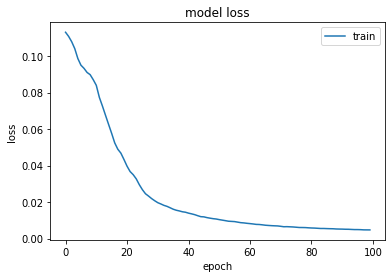

In [67]:
#######LOSS
plt.plot(tr_logs.history['loss'])
#plt.plot(tr_logs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [68]:
ae_latent = encoder.predict(Xw)
#print(ae_latent)

In [ ]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(ae_latent)

ax.scatter3D(X_PCA[:68, 0], X_PCA[:68, 1],X_PCA[:68, 2], c='red', label='BluesDriver')
ax.scatter3D(X_PCA[69:137, 0], X_PCA[69:137, 1],X_PCA[69:137, 2], c='green', label='Chorus')
ax.scatter3D(X_PCA[138:206, 0], X_PCA[138:206, 1],X_PCA[138:206, 2], c='blue', label='Clean')
ax.scatter3D(X_PCA[207:275, 0], X_PCA[207:275, 1],X_PCA[207:275, 2], c='red', label='Digital Delay')
ax.scatter3D(X_PCA[276:344, 0], X_PCA[276:344, 1],X_PCA[276:344, 2], c='yellow', label= 'Flanger')
ax.scatter3D(X_PCA[345:413, 0], X_PCA[345:413, 1],X_PCA[345:413, 2], c='black', label='Phaser')
ax.scatter3D(X_PCA[414:482, 0], X_PCA[414:482, 1],X_PCA[414:482, 2], c='white', label='RAT')
ax.scatter3D(X_PCA[483:551, 0], X_PCA[483:551, 1],X_PCA[483:551, 2], c='orange', label='Sweep Echo')
ax.scatter3D(X_PCA[552:620, 0], X_PCA[552:620, 1],X_PCA[552:620, 2], c='pink', label='TapeEcho')
ax.scatter3D(X_PCA[621:689, 0], X_PCA[621:689, 1],X_PCA[621:689, 2], c='brown', label='TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

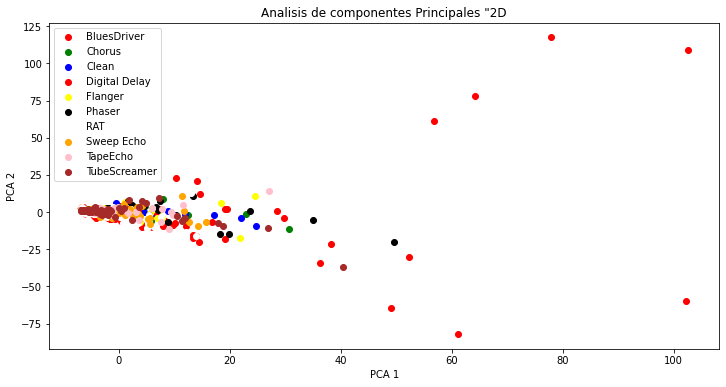

In [ ]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(ae_latent)

plt.scatter(X_PCA[:68, 0], X_PCA[:68, 1], c='red', label='BluesDriver')
plt.scatter(X_PCA[69:137, 0], X_PCA[69:137, 1], c='green', label='Chorus')
plt.scatter(X_PCA[138:206, 0], X_PCA[138:206, 1], c='blue', label='Clean')
plt.scatter(X_PCA[207:275, 0], X_PCA[207:275, 1], c='red', label= 'Digital Delay')
plt.scatter(X_PCA[276:344, 0], X_PCA[276:344, 1], c='yellow', label= 'Flanger')
plt.scatter(X_PCA[345:413, 0], X_PCA[345:413, 1], c='black', label= 'Phaser')
plt.scatter(X_PCA[414:482, 0], X_PCA[414:482, 1], c='white', label= 'RAT')
plt.scatter(X_PCA[483:551, 0], X_PCA[483:551, 1], c='orange', label= 'Sweep Echo')
plt.scatter(X_PCA[552:620, 0], X_PCA[552:620, 1], c='pink', label= 'TapeEcho')
plt.scatter(X_PCA[621:689, 0], X_PCA[621:689, 1], c='brown', label= 'TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

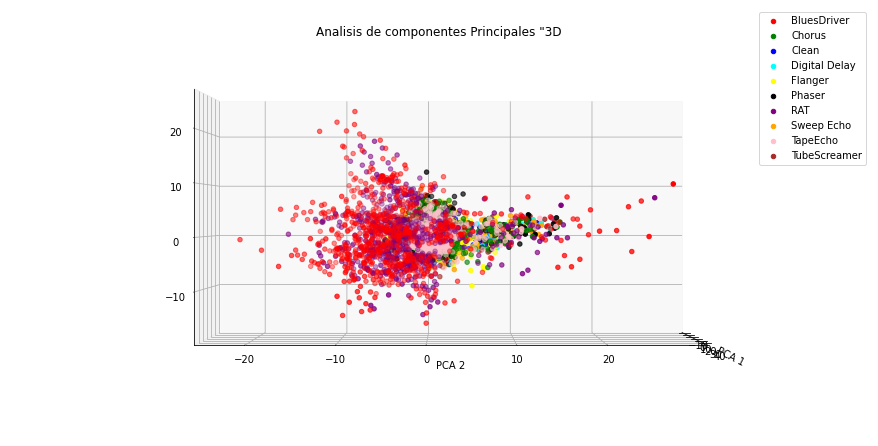

In [72]:
###visualización PCA 3D #########
###visualización PCA 3D #########
###visualización PCA 3D #########

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig,elev=-0, azim=0)
pca = PCA(n_components= 3)
X_PCA = pca.fit_transform(ae_latent)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label='BluesDriver')
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label='Chorus')
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label='Clean')
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='cyan', label='Digital Delay')
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label='Flanger')
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label='Phaser')
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='purple', label='RAT')
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= 'Sweep Echo')
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label='TapeEcho')
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label='TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "3D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#plt.zlabel('PCA 3')

plt.show()

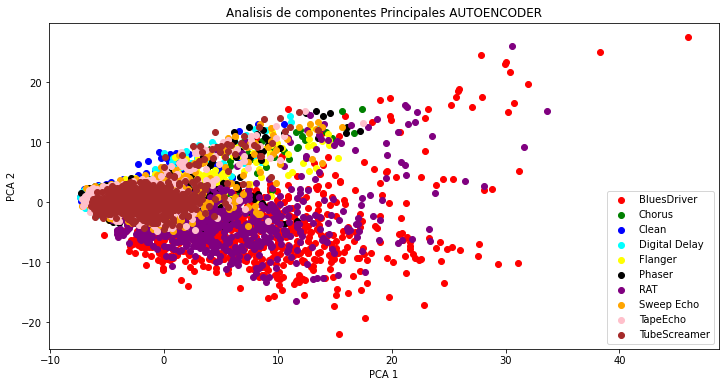

In [73]:
#####PCA 2D ##########
#####PCA 2D ##########
#####PCA 2D ##########

fig = plt.figure(1, figsize=(12, 6))
pca = PCA(n_components= 2)
X_PCA = pca.fit_transform(ae_latent)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='red', label= 'BluesDriver')
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='green', label= 'Chorus')
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='blue', label= 'Clean')
plt.scatter(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1], c='cyan', label= 'Digital Delay')
plt.scatter(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1], c='yellow', label= 'Flanger')
plt.scatter(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1], c='black', label= 'Phaser')
plt.scatter(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1], c='purple', label= 'RAT')
plt.scatter(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1], c='orange', label= 'Sweep Echo')
plt.scatter(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1], c='pink', label= 'TapeEcho')
plt.scatter(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1], c='brown', label= 'TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales AUTOENCODER')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
#########     ################
#########     ################
######### VAE ################
#########     ################

In [19]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""
    #@tf.function
    def call(self, inputs):
        z_mean, z_log_var = inputs
        #z_mean = np.array([input[0]])
        #z_log_var = np.array([input[1]])
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [20]:
class KLDivergenceRegularizer(tf.keras.regularizers.Regularizer):
  def __init__(self, iters: tf.Variable, warm_up_iters: int, latent_size: int):
    self._iters = np.array([iters])
    self._warm_up_iters = np.array([warm_up_iters])
    self.latent_size = latent_size
  
  @tf.function
  def __call__(self, activation):
    # note: activity regularizers automatically divide by batch size
    mu= activation[:self.latent_size]
    log_var = activation[self.latent_size:]
    k = np.min(self._iters / self._warm_up_iters)
    return -0.5 * k * K.sum(1+ log_var - K.square(mu) - K.exp(log_var))

In [21]:
warm_up_iters = 1000 
optimizer = tf.keras.optimizers.Adam(0.0001)

In [22]:
latent_dim = 128
original_dim = (sr16k, 1, 1)
encoder_inputs = keras.Input((16000, 1, 1))                                                   # bat, samps, ?, ch
x = layers.Conv2D(64, (33,1), activation="relu", padding="same",strides=(4,1))(encoder_inputs) # [69, 48000, 1, 1] -> [69, 12000, 1, 64]
x = layers.Conv2D(128,(33,1), activation="relu", padding="same",strides=(4,1))(x)
x = layers.Conv2D(256,(33,1), activation="relu", padding="same",strides=(4,1))(x)
latent = layers.Conv2D(512,(33,1), activation="relu", padding="same",strides=(3,1))(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
z_mean = layers.Dense(units=latent_dim, name='Z-Mean')(x) # Mean component
z_log_sigma = layers.Dense(units=latent_dim, name='Z-Log-Sigma')(x) # Standard deviation component
#######que pasa con z_regular nunca se usa?
z_regular = tf.keras.layers.Concatenate(activity_regularizer= KLDivergenceRegularizer(optimizer.iterations, warm_up_iters,latent_dim))([z_mean,z_log_sigma])
z = Sampling()([z_mean, z_log_sigma])
#z = Sampling()(z_regular)
vae_encoder = keras.Model(encoder_inputs, [z_mean, z_log_sigma, z], name="encoder_vae")
vae_encoder.summary()

Model: "encoder_vae"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 16000, 1, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 4000, 1, 64)  2176        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1000, 1, 128  270464      ['conv2d[0][0]']                 
                                )                                                                 
                                                                                        

In [23]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(250 * 1 * 256, activation="relu")(latent_inputs)
x = layers.Reshape((250, 1, 256))(x)
#x = layers.Conv2DTranspose(512,(4,1), activation="relu",padding= "same",strides= (3,1))(x)
x = layers.Conv2DTranspose(128,(33,1), activation="relu",padding= "same",strides= (4,1))(x)
x = layers.Conv2DTranspose(64,(33,1), activation="relu",padding= "same",strides= (4,1))(x)
#x = layers.Conv2DTranspose(64,(16,1), activation="relu",padding= "same",strides=(4,1))(x)
decoder_outputs = layers.Conv2DTranspose(1, (33, 1), activation="tanh", padding="same", strides = (4,1))(x)
vae_decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder_vae")
vae_decoder.summary()

Model: "decoder_vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense_1 (Dense)             (None, 64000)             8256000   
                                                                 
 reshape (Reshape)           (None, 250, 1, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 1000, 1, 128)     1081472   
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 4000, 1, 64)      270400    
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 16000, 1, 1)      

In [24]:
# Define outputs from a VAE model by specifying how the encoder-decoder models are linked
outpt = vae_decoder(vae_encoder(encoder_inputs)[2]) # note, outputs available from encoder model are z_mean, z_log_sigma and z. We take z by specifying [2]
# Instantiate a VAE model
vae = Model(inputs=encoder_inputs, outputs=outpt, name='VAE-Model')
vae.compile(optimizer= optimizer,loss = 'mean_squared_error')

#vae.summary()

In [26]:
tr_logs = vae.fit(Xw,Xw, shuffle = True, batch_size= 5, epochs= 50)

Epoch 1/50
1380/1380 [==============================] - 31s 23ms/step - loss: 0.0159
Epoch 2/50
1380/1380 [==============================] - 32s 23ms/step - loss: 0.0156
Epoch 3/50
1380/1380 [==============================] - 31s 23ms/step - loss: 0.0150
Epoch 4/50
1380/1380 [==============================] - 31s 23ms/step - loss: 0.0144
Epoch 5/50
1380/1380 [==============================] - 31s 23ms/step - loss: 0.0141
Epoch 6/50
1380/1380 [==============================] - 32s 23ms/step - loss: 0.0138
Epoch 7/50
1380/1380 [==============================] - 31s 23ms/step - loss: 0.0136
Epoch 8/50
1380/1380 [==============================] - 31s 23ms/step - loss: 0.0133
Epoch 9/50
1380/1380 [==============================] - 31s 23ms/step - loss: 0.0129
Epoch 10/50
1380/1380 [==============================] - 31s 23ms/step - loss: 0.0128
Epoch 11/50
1380/1380 [==============================] - 31s 23ms/step - loss: 0.0127
Epoch 12/50
1380/1380 [==============================] - 31s 23

In [ ]:
plt.plot(tr_logs.history['loss'])
#plt.plot(tr_logs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
vae.save('/content/drive/MyDrive/SampledGuitar')

In [80]:
##get the latent space mean, sigma, z
latent = vae_encoder.predict(Xw)

In [81]:
print(latent[0].shape)

(6900, 128)


In [28]:
y_hat = vae.predict(Xw)

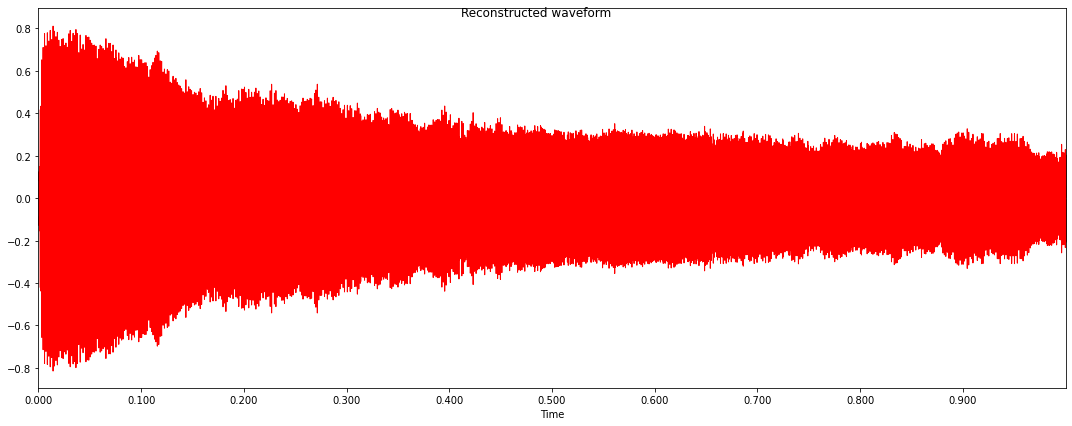

In [58]:
import matplotlib.pyplot as plt
import librosa.display
 
plt.figure(figsize=(15, 6)).suptitle("Reconstructed waveform")
librosa.display.waveplot(y_hat[6210].flatten(),sr= sr16k, color='r')
plt.tight_layout()
plt.show()

In [61]:
print(sonidos)
IPython.display.Audio(y_hat[6210].flatten(), rate= sr16k)

[0, 690, 1380, 2070, 2760, 3450, 4140, 4830, 5520, 6210]


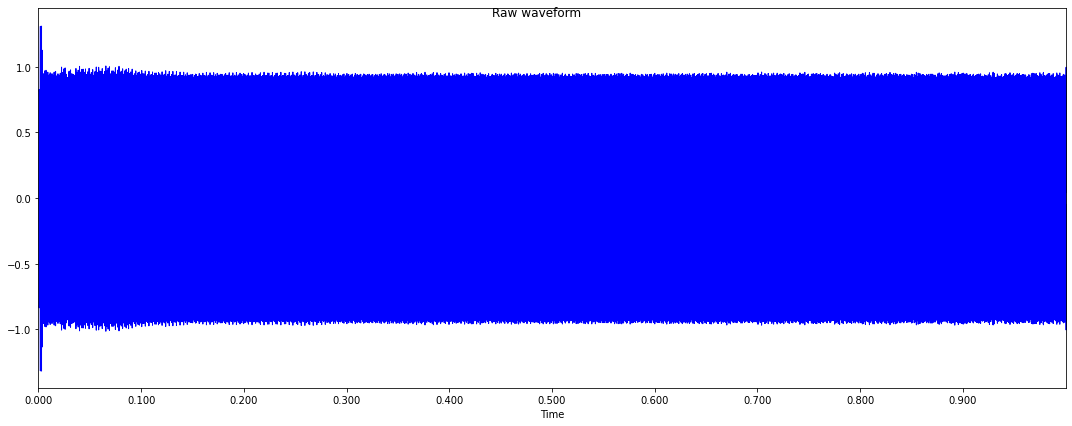

In [74]:

plt.figure(figsize=(15, 6)).suptitle("Raw waveform")
librosa.display.waveplot(Xw[500].flatten(),sr= sr16k, color='b')
plt.tight_layout()
plt.show()

In [45]:
IPython.display.Audio(Xw[500].flatten(), rate= sr16k)

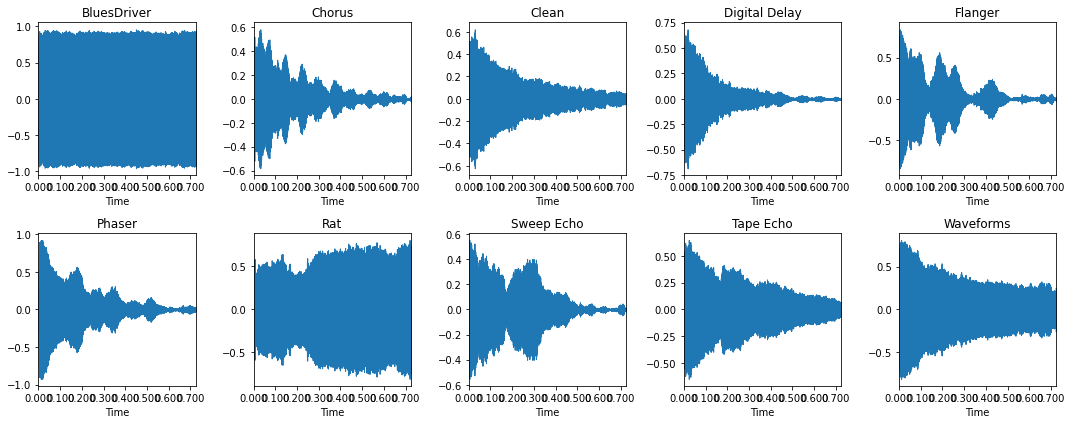

In [42]:
####visualización de los audios antes de normalizar
plt.figure(figsize=(15, 6))
sonidos = [i * 690 for i in range(10)]
for i, x in enumerate(sonidos):
    plt.subplot(2, 5, i+ 1).set_title(fx[i])
    librosa.display.waveplot(y_hat[x].flatten()color='r')
plt.tight_layout()
plt.title("Waveforms")
plt.show()

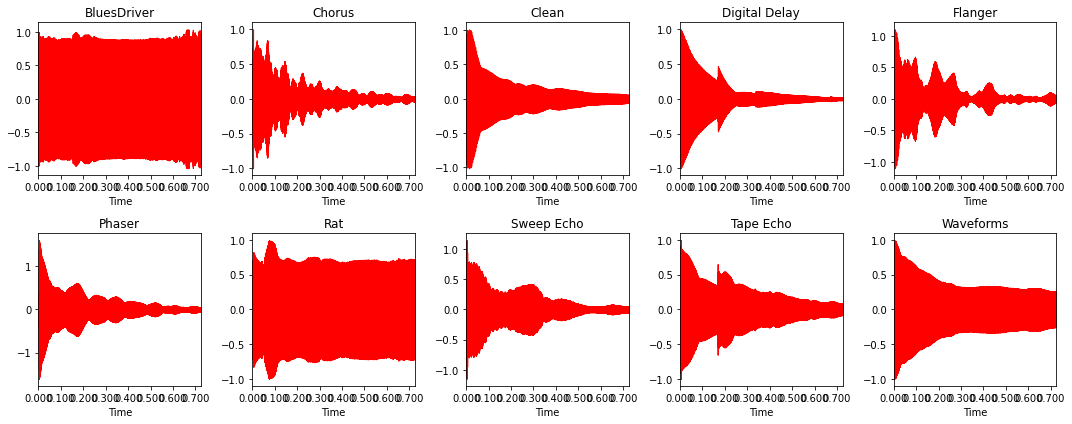

In [75]:
plt.figure(figsize=(15, 6))
sonidos = [i * 690 for i in range(10)]
for i, x in enumerate(sonidos):
    plt.subplot(2, 5, i+ 1).set_title(fx[i])
    librosa.display.waveplot(Xw[x].flatten(), color='r')
plt.tight_layout()
plt.title("Waveforms")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


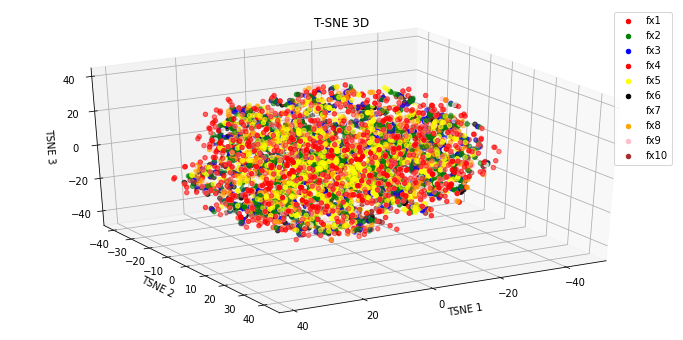

In [62]:
##ploting latent space with T-SNE
from sklearn.manifold import TSNE 

fig = plt.figure(1, figsize=(12, 6))
#a3x = Axes3D(fig,elev=-20, azim=100)
tsne = TSNE(n_components= 3)  # create an instance of t-SNE
ax = plt.axes(projection = "3d")
X_PCA = tsne.fit_transform(latent[0])  # fit and transform the data


ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= 'BluesDriver')
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= 'Chorus')
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label= 'Clean')
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='cyan', label= 'Digital Delay')
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= 'Flanger')
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label= 'Phaser')
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='purple', label= 'RAT')
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= 'Sweep Echo')
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label= 'TapeEcho')
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label= 'TubeScreamer')
ax.view_init(30,60)
plt.title('T-SNE 3D')
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')
ax.legend()
plt.show()

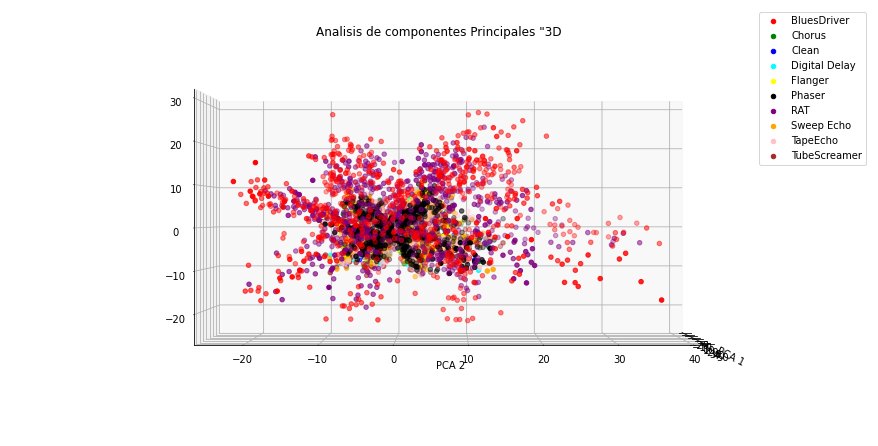

In [40]:
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig,elev=-0, azim=0)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

X_PCA = pca.fit_transform(latent[0])
ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label='BluesDriver')
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label='Chorus')
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label='Clean')
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='cyan', label='Digital Delay')
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label='Flanger')
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label='Phaser')
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='purple', label='RAT')
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= 'Sweep Echo')
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label='TapeEcho')
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label='TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "3D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#plt.zlabel('PCA 3')

plt.show()

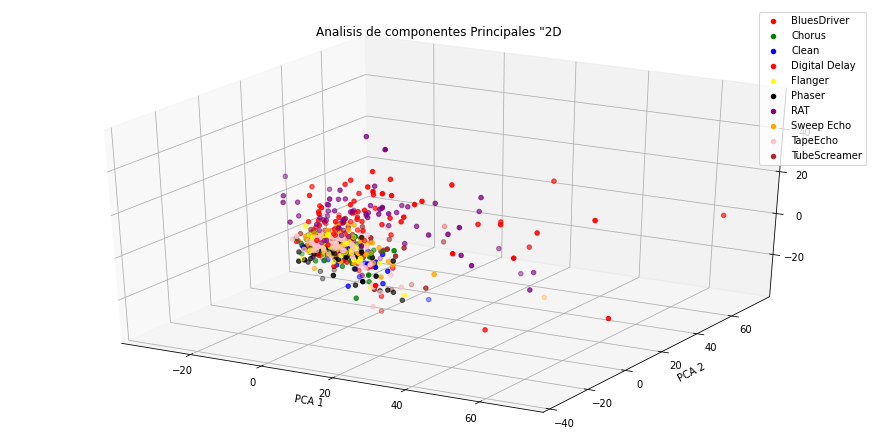

In [ ]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0])

ax.scatter3D(X_PCA[:68, 0], X_PCA[:68, 1],X_PCA[:68, 2], c='red', label='BluesDriver')
ax.scatter3D(X_PCA[69:137, 0], X_PCA[69:137, 1],X_PCA[69:137, 2], c='green', label='Chorus')
ax.scatter3D(X_PCA[138:206, 0], X_PCA[138:206, 1],X_PCA[138:206, 2], c='blue', label='Clean')
ax.scatter3D(X_PCA[207:275, 0], X_PCA[207:275, 1],X_PCA[207:275, 2], c='red', label='Digital Delay')
ax.scatter3D(X_PCA[276:344, 0], X_PCA[276:344, 1],X_PCA[276:344, 2], c='yellow', label= 'Flanger')
ax.scatter3D(X_PCA[345:413, 0], X_PCA[345:413, 1],X_PCA[345:413, 2], c='black', label='Phaser')
ax.scatter3D(X_PCA[414:482, 0], X_PCA[414:482, 1],X_PCA[414:482, 2], c='purple', label='RAT')
ax.scatter3D(X_PCA[483:551, 0], X_PCA[483:551, 1],X_PCA[483:551, 2], c='orange', label='Sweep Echo')
ax.scatter3D(X_PCA[552:620, 0], X_PCA[552:620, 1],X_PCA[552:620, 2], c='pink', label='TapeEcho')
ax.scatter3D(X_PCA[621:689, 0], X_PCA[621:689, 1],X_PCA[621:689, 2], c='brown', label='TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

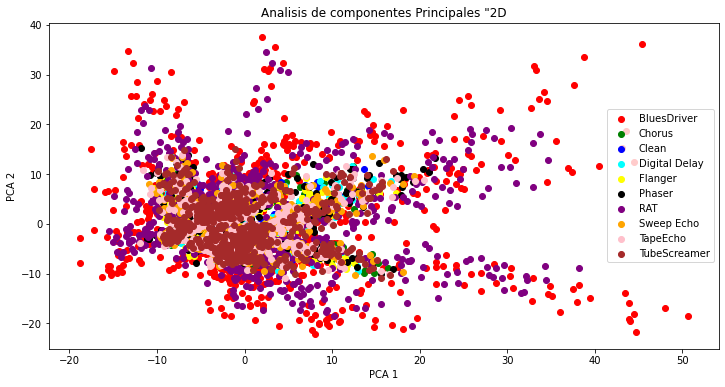

In [41]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0])

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='red', label= 'BluesDriver')
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='green', label= 'Chorus')
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='blue', label= 'Clean')
plt.scatter(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1], c='cyan', label= 'Digital Delay')
plt.scatter(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1], c='yellow', label= 'Flanger')
plt.scatter(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1], c='black', label= 'Phaser')
plt.scatter(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1], c='purple', label= 'RAT')
plt.scatter(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1], c='orange', label= 'Sweep Echo')
plt.scatter(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1], c='pink', label= 'TapeEcho')
plt.scatter(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1], c='brown', label= 'TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

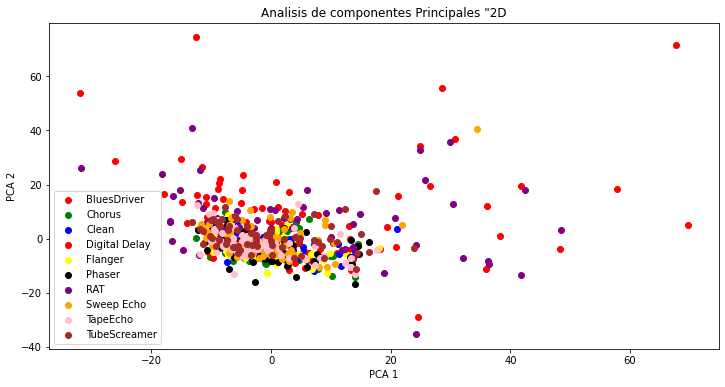

In [ ]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0])

plt.scatter(X_PCA[:68, 0], X_PCA[:68, 1], c='red', label='BluesDriver')
plt.scatter(X_PCA[69:137, 0], X_PCA[69:137, 1], c='green', label='Chorus')
plt.scatter(X_PCA[138:206, 0], X_PCA[138:206, 1], c='blue', label='Clean')
plt.scatter(X_PCA[207:275, 0], X_PCA[207:275, 1], c='red', label= 'Digital Delay')
plt.scatter(X_PCA[276:344, 0], X_PCA[276:344, 1], c='yellow', label= 'Flanger')
plt.scatter(X_PCA[345:413, 0], X_PCA[345:413, 1], c='black', label= 'Phaser')
plt.scatter(X_PCA[414:482, 0], X_PCA[414:482, 1], c='purple', label= 'RAT')
plt.scatter(X_PCA[483:551, 0], X_PCA[483:551, 1], c='orange', label= 'Sweep Echo')
plt.scatter(X_PCA[552:620, 0], X_PCA[552:620, 1], c='pink', label= 'TapeEcho')
plt.scatter(X_PCA[621:689, 0], X_PCA[621:689, 1], c='brown', label= 'TubeScreamer')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [102]:
########################## sampling ###########################
print(latent[0][2][0])
print(latent[0][3][0])

created = (latent[0][2]) +(latent[0][2]- latent[0][3])
print(created)
#gen = np.linspace(-20,50,sr16k)
#print(gen)

-0.4570368
-0.7511018
[-1.62971795e-01 -8.37831402e+00  4.03902435e+00 -1.06338358e+01
  1.96669030e+00 -1.13947458e+01 -9.19527817e+00 -1.56194234e+00
 -4.23577738e+00 -3.89131498e+00  7.57673502e+00 -1.93942785e-01
  4.73715401e+00 -9.15318298e+00 -1.14945230e+01  8.33033085e+00
  9.95702553e+00  1.15837288e+01  8.72678566e+00  5.84881353e+00
  1.15363283e+01  1.22662678e+01  1.65260231e+00 -2.48811102e+00
  5.23954725e+00  2.02485313e+01  7.11759901e+00 -7.41324043e+00
 -6.87192106e+00  1.11127920e+01 -1.50610180e+01 -1.35482526e+00
  1.08697567e+01 -7.86581326e+00 -4.07251644e+00  3.64564633e+00
  1.29993725e+01 -1.06630564e+00 -2.21184182e+00  1.15031681e+01
  1.45445862e+01  1.45560598e+00  7.01172447e+00  4.42690945e+00
 -1.31544609e+01 -8.32717597e-01 -1.53816032e+00  5.39551258e-01
  1.27018089e+01  7.26415730e+00 -6.02542591e+00 -1.69747314e+01
 -1.10948792e+01  7.60687351e+00  7.69757271e+00  9.80192184e+00
 -8.38609755e-01  1.32088256e+00 -1.04396563e+01 -1.68190885e+00
  3

In [41]:
import numpy as np
a = np.random.random()
b = np.array([-0.5, 0.5, 0.2])

#a = [0.5, 1, 3]
#b = [-0.5, 0.5, 0.2]

def latent_inter(audio_a, audio_b, step = 1):
  'step hace referencia al numero de audios entre las referencias'
  if step ==1:
    listas = np.linspace(audio_a, audio_b, step + 1, endpoint=False).flatten()
  else:
    listas = np.linspace(audio_a, audio_b, step + 1, endpoint=False)
  return listas[1:]

latent_inter(a, b,2)

array([[ 0.16666667,  0.83333333,  2.06666667],
       [-0.16666667,  0.66666667,  1.13333333]])